# Goal: To calculate years of experience to salary. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [4]:
df.shape

(30, 3)

In [5]:
df.drop('Age',axis=1,inplace=True)

In [6]:
df.isnull().count()

YearsExperience    30
Salary             30
dtype: int64

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [10]:
import matplotlib.pyplot as plt

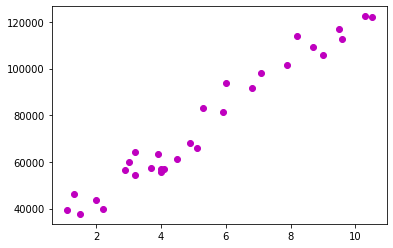

In [11]:
plt.scatter(X,y,color='m')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 0)

In [14]:
x_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [15]:
y_train

array([ 56642,  66029,  64445,  61111, 113812,  91738,  46205, 121872,
        60150,  39891,  81363,  93940,  57189,  54445, 105582,  43525,
        39343,  98273,  67938,  56957], dtype=int64)

In [16]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [22]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

In [23]:
error = y_pred - y_test
error

array([ 3104.10590871,   688.39940819,  8053.55626083,    47.36777221,
       -1366.35454631, -1305.1085008 ,  3902.23969801,  8405.96201652,
       -6738.31280742,  -652.8624553 ])

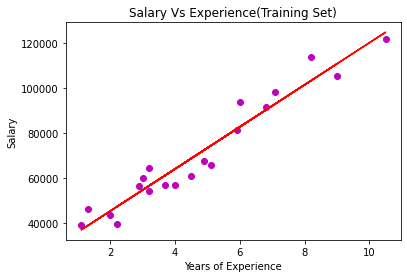

In [24]:
# Visualizing the training set.

plt.scatter(x_train,y_train,color="m")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.title("Salary Vs Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

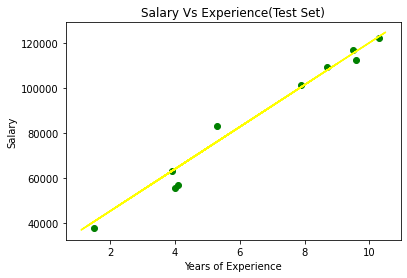

In [25]:
# Visualizing the test set.


plt.scatter(x_test,y_test,color="g")
plt.plot(x_train,lr.predict(x_train),color="yellow")
plt.title("Salary Vs Experience(Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [26]:
print (" Coffefficient is", lr.coef_, "\n Intercept is" ,lr.intercept_)

 Coffefficient is [9345.94244312] 
 Intercept is 26816.192244031183


In [27]:
# Manually checking the value using the below formula.
# y = m * x + C

m = 9345.942
c = 26816.19
y  = m * 1.2 + c        # Checking salary for the experience of 1.2 years
print("Value of y using manual method is", round(y,2))

Value of y using manual method is 38031.32


In [28]:
y_test.shape

(10,)

In [29]:
y_pred.shape

(10,)

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                           

print("RMSE value is", round(rmse,4))
print("R2 Score is ",round(r2,4))

RMSE value is 4585.4157
R2 Score is  0.9749


In [31]:
import joblib
joblib.dump(lr, "exp-sal.pkl")

['exp-sal.pkl']

In [32]:
model = joblib.load("exp-sal.pkl")

In [33]:
round(model.predict([[2]])[0],3)

45508.077